In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config Inline.Backend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

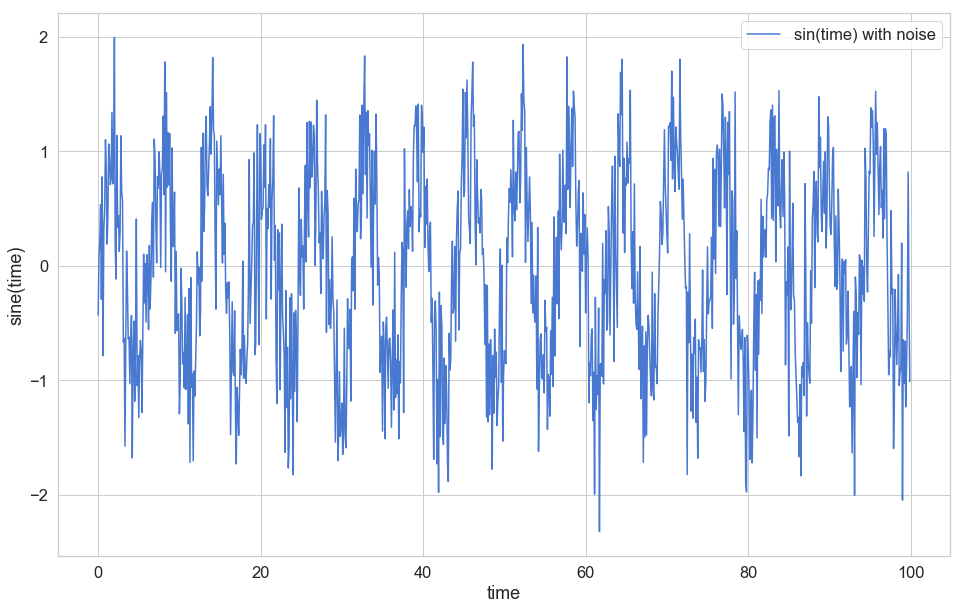

In [14]:
time = np.arange(0, 100, 0.1).round(decimals=3)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

plt.plot(time, sin, label='sin(time) with noise')
plt.xlabel('time')
plt.ylabel('sine(time)')
plt.legend()

In [37]:
# df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
df = pd.DataFrame(sin, index=time, columns=['sine'])

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size

train, test = df.iloc[:train_size], df.iloc[train_size:]

print(len(train), len(test))

800 200


In [46]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i: i + time_steps].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [49]:
time_steps = 10
X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)
print(X_train.shape, y_train.shape)

(790, 10, 1) (790,)


In [71]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=128,
    input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(0.001)
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [72]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    verbose=1,
    shuffle=False
)

Train on 632 samples, validate on 158 samples
Epoch 1/30
632/632 [==============================] - 2s 3ms/sample - loss: 0.4211 - val_loss: 0.3601
Epoch 2/30
632/632 [==============================] - 0s 603us/sample - loss: 0.3242 - val_loss: 0.3335

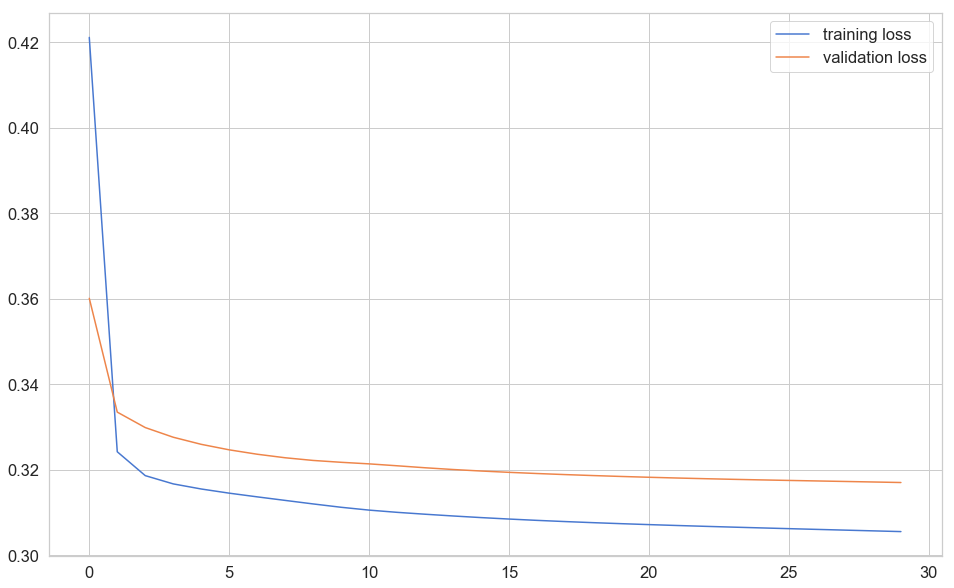

In [75]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

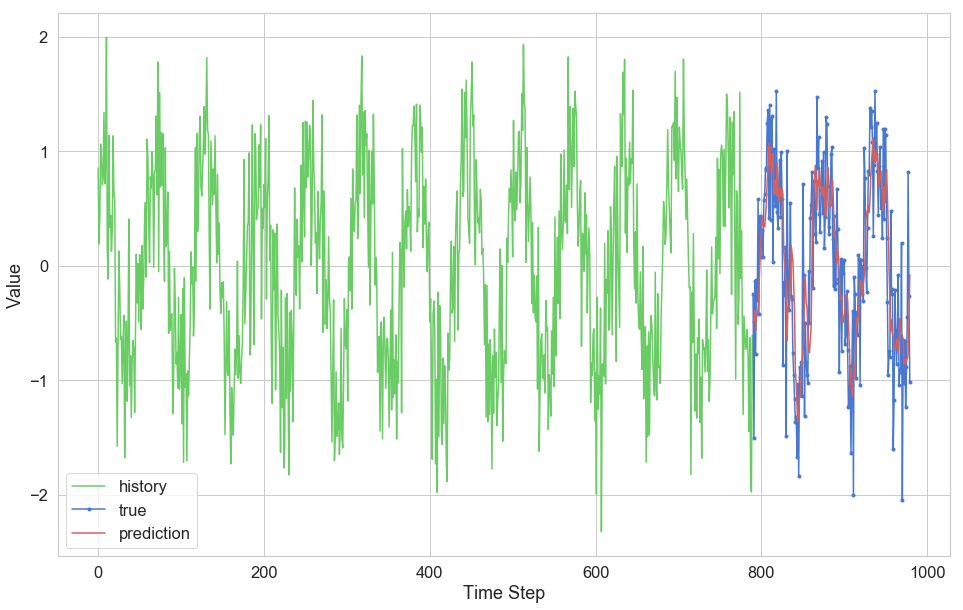

In [78]:
y_pred = model.predict(X_test)

plt.plot(np.arange(0, len(y_train)), y_train, 'g', label='history')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label='true')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label='prediction')
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

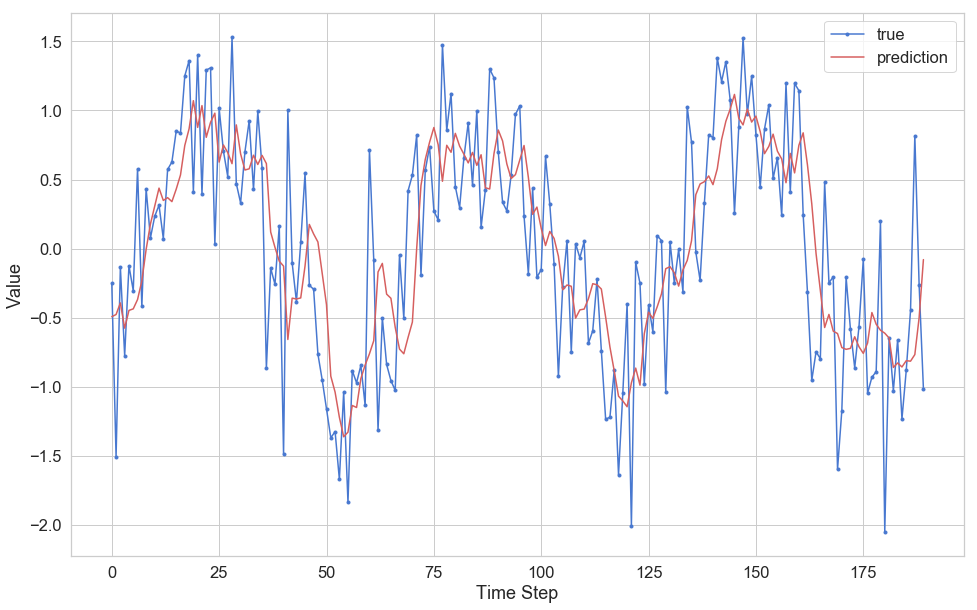

In [79]:
plt.plot(y_test, marker='.', label='true')
plt.plot(y_pred, 'r', label='prediction')
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

